In [1]:
%pylab inline
from state.map import X_MAX, Y_MAX, ARENA_WALLS 
from math import sqrt
from math import pi
import robot.state.particle_filtering
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Generate empty space with right dimensions

def gen_lines():
    lines = []
    for wall in ARENA_WALLS:
        start = wall[0]
        delta = wall[1]

        end = np.add(start, delta)

        line_xs = []
        line_ys = []

        line_xs.append(start[0])
        line_xs.append(end[0])
        line_ys.append(start[1])
        line_ys.append(end[1])

        lines.append(Line2D(line_xs, line_ys, linewidth=2))
        
    return lines 

def plot(particles, r):
    dpi = 80
    width = X_MAX / dpi;
    height = Y_MAX / dpi;
    figure = plt.figure(figsize=(width,height))

    ax = figure.add_subplot(1,1,1)

    ax.set_ylim(top=Y_MAX, bottom=0)
    ax.set_xlim(right=X_MAX, left=0)

    lines = gen_lines()
    for line in lines:
        ax.add_line(line)

    transpose_locations = particles.locations.T
    transpose_orientations = particles.orientations.T
    
    ax.quiver(transpose_locations[0], transpose_locations[1], np.sin(transpose_orientations), np.cos(transpose_orientations), pivot='mid')
    
    x, y, o = particles.get_position_by_weighted_average()
    ax.quiver(x, y, np.sin(o), np.cos(o), color='r', pivot='mid')
    x, y, o = particles.get_position_by_max_weight(position_confidence=False)
    ax.quiver(x, y, np.sin(o), np.cos(o), color='m', pivot='mid')
    ax.quiver(r.location[0], r.location[1], 
              np.sin(r.orientation), np.cos(r.orientation), 
              color='b', pivot='mid')

    return figure

01:02:07 - Weighted average pose: 40.6043, 34.2782, 3.12005
01:02:07 - Max weight pose: 48, 31, 0.656364


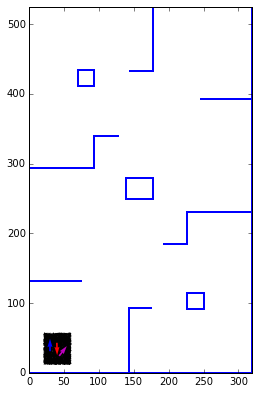

In [14]:
figure = plot(particles, r)
plt.show(figure)

In [13]:
reload(robot.state.particle_filtering)
particles = robot.state.particle_filtering.Particles(n=100, where='1base')
r = robot.state.particle_filtering.Robot(30, 40, 0)

01:01:58 - Initiating particle filtering with setting where=1base
01:01:58 - CHANGED NUMBER OF PARTICLES: 3824


157.432659399
01:02:43 - KLD PARTICLES: 284
210.106852304
01:02:43 - KLD PARTICLES: 195
25.1363500585
01:02:43 - KLD PARTICLES: 225
118.664649104
01:02:43 - KLD PARTICLES: 255
225.102352697
01:02:43 - KLD PARTICLES: 225
208.611393115
28.1836115047
01:02:43 - KLD PARTICLES: 162
127.974599158
01:02:43 - KLD PARTICLES: 162
154.094425765
125.842898814
01:02:44 - KLD PARTICLES: 240
01:02:44 - Weighted average pose: 65.55, 31.625, 3.31531
01:02:44 - Max weight pose: 67, 35, 3.26546


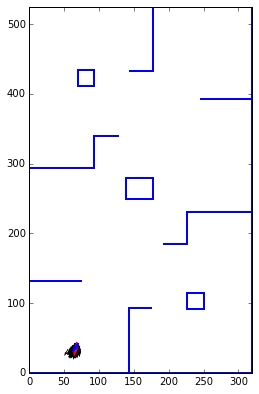

240.000389815


In [17]:
for i in xrange(10):
    factor = 10
    r.rotate(pi/factor)
    particles.rotate(pi/factor)
    particles.sense(r.measurement_prediction())
    distance = 5.0
    r.forward(distance)
    particles.forward(distance)
    particles.sense(r.measurement_prediction())
    particles.resample()
figure = plot(particles, r)
plt.show(figure)
particles.resample()

In [360]:
particles.N

207

In [57]:
particles.get_position_by_max_weight()

14:28:41 - Max weight pose: 249, 470, 3.43523


(249, 470, 3.4352319, 0.0)

In [ ]:
robot.measurement_prediction()

In [ ]:
particles.resample()

In [ ]:
np.random.random((10,2))[0][1]

In [ ]:
robot.measurement_prediction()

In [ ]:
robot.rotate(1)

In [ ]:
particles.resample()

In [ ]:
orientations = np.zeros(10)
ROTATION_STD_ABS = (5.0/360.0)*2*pi
rotation = 1

In [ ]:
%timeit (orientations + (np.random.rand(10) * ROTATION_STD_ABS - 0.5 * ROTATION_STD_ABS + rotation)) % (2.0 * pi)

In [ ]:
%timeit np.mod(np.add(orientations,np.add(np.multiply(np.random.rand(10),ROTATION_STD_ABS),-0.5*ROTATION_STD_ABS + rotation)), 2.0 * pi)

In [2]:
reload(robot.state.particle_filtering)

<module 'robot.state.particle_filtering' from 'robot/state/particle_filtering.pyc'>

In [3]:
robot.state.particle_filtering.Particles.generate_raycasting_distances(0,1)

0
[1 1] 0.0 {'IR_left': 12.852549211436648, 'sonar': 753.0687219636732, 'IR_right': 16.524706128989976}
[1 1] 0.0245436926062 {'IR_left': 11.38494386481004, 'sonar': 753.0687219636732, 'IR_right': 18.251892882169589}
[1 1] 0.0490873852123 {'IR_left': 10.017878044749391, 'sonar': 753.0687219636732, 'IR_right': 20.123883629332301}
[1 1] 0.0736310778185 {'IR_left': 8.7397759944549449, 'sonar': 753.0687219636732, 'IR_right': 22.162082403173912}
[1 1] 0.0981747704247 {'IR_left': 7.5407380638456498, 'sonar': 753.0687219636732, 'IR_right': 24.392280535516054}
[1 1] 0.122718463031 {'IR_left': 6.4122459459844157, 'sonar': 753.0687219636732, 'IR_right': 26.845844914549499}
[1 1] 0.147262155637 {'IR_left': 5.3469279086049539, 'sonar': 753.0687219636732, 'IR_right': 29.561314395658954}
[1 1] 0.171805848243 {'IR_left': 4.338370234745442, 'sonar': 753.0687219636732, 'IR_right': 32.586577873862176}
[1 1] 0.196349540849 {'IR_left': 3.3809645912759656, 'sonar': 753.0687219636732, 'IR_right': 35.9818972

KeyboardInterrupt: 

In [ ]:
data_10_20 = np.load('data_10_20.dat.npy')
data_20_30 = np.load('data_20_30.dat.npy')
data_30_40 = np.load('data_30_40.dat.npy')
raycasting_distances = np.concatenate([data_00_10[0:10],data_10_20[10:20],data_20_30[20:30],data_30_40[30:40]])
np.save("raycasting_distances", raycasting_distances)

In [ ]:
data = []
for i in xrange(8):
    data.append(np.load('bin2/data_' + str(i*20) + '_' + str((i+1)*20) + '.dat.npy')[i*20:(i+1)*20])
raycasting_distances_bin2 = np.concatenate(data)
raycasting_distances_bin2

In [ ]:
#a = robot.state.particle_filtering.Particles.generate_closest_distances()
#np.save("closest_distances", a)

In [ ]:
np.cumsum(np.arange(5))

In [ ]:
np.save("raycasting_distances_bin2", raycasting_distances_bin2)

In [ ]:
raycasting_distances[3][3][126]

In [ ]:
reload(state.particle_filtering)

In [ ]:
n=100000
distance = 60
measurements = state.particle_filtering.Particles.model_beam(distance, n)
predictions = np.multiply(np.ones(n), distance)

In [ ]:
state.particle_filtering.Particles.learn_intrinsic_parameters(measurements, predictions)

In [ ]:

np.std(measurements)

In [ ]:
a = []
f = open('./log/collect_front_IR_and_sonar_measurements0.csv', 'r')
line = f.readline()
while line:
    line = line.replace("\n", "")
    line = line.replace("[", "")
    line = line.replace("]", "")
    line = line.split(",")
    b=[]
    for i in line:
        b.append(float(i))
    a.append(b)
    line = f.readline()

measurements = np.array(a)

In [ ]:
measurements.T[0].shape

In [ ]:
predictions = np.multiply(59.0, np.ones(measurements.T[0].shape))

In [ ]:
predictions120 = np.multiply(120.0, np.ones(measurements.T[0].shape))

In [ ]:
predictions.shape

In [ ]:
import robot.state.particle_filtering
reload(robot.state.particle_filtering)

In [ ]:
robot.state.particle_filtering.Particles.learn_intrinsic_parameters(measurements.T[0], predictions120)

In [ ]:
robot.state.particle_filtering.Particles.learn_intrinsic_parameters(measurements.T[1], predictions)

In [ ]:
robot.state.particle_filtering.Particles.learn_intrinsic_parameters(measurements.T[2], predictions)